In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
# reference
def get_ref():
    
    reference_df = pd.read_csv("analysis/reference-clashes.csv")
    ref_df = pd.read_csv("analysis/reference-clashes.csv", index_col = 0)
    
    return reference_df, ref_df


In [3]:
#run-no-ambig results
def make_df_list(run):
    df_3J95 = pd.read_csv(("analysis/{}/3J95_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_3J96 = pd.read_csv(("analysis/{}/3J96_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_5GRS = pd.read_csv(("analysis/{}/5GRS_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_5HNY = pd.read_csv(("analysis/{}/5HNY_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_5WCB = pd.read_csv(("analysis/{}/5WCB_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6ACG = pd.read_csv(("analysis/{}/6ACG_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6AHF = pd.read_csv(("analysis/{}/6AHF_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6C06 = pd.read_csv(("analysis/{}/6C06_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6C3P = pd.read_csv(("analysis/{}/6C3P_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6ENY = pd.read_csv(("analysis/{}/6ENY_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6IRF = pd.read_csv(("analysis/{}/6IRF_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6N1Q = pd.read_csv(("analysis/{}/6N1Q_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6N7G = pd.read_csv(("analysis/{}/6N7G_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6N8T = pd.read_csv(("analysis/{}/6N8T_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6N8Z = pd.read_csv(("analysis/{}/6N8Z_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6R7I = pd.read_csv(("analysis/{}/6R7I_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6UBY = pd.read_csv(("analysis/{}/6UBY_clashes.csv").format(run)).sort_values(["atomic-clashes"])
    df_6UC0 = pd.read_csv(("analysis/{}/6UC0_clashes.csv").format(run)).sort_values(["atomic-clashes"])

    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6C06,
        df_6C3P,
        df_6ENY,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8T,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list


In [4]:
def make_tops_dict(run):
    
    reference_df, ref_df = get_ref()
    tops = [50, 25, 10, 5, 1]
    clash_dict = {}
    df_list = make_df_list(run)

    for index, df in enumerate(df_list):
        df = df.loc[:,"atomic-clashes"]
        ref = reference_df.iloc[index].values
        compl = ref[0]
        ref_cor = ref[1]
        #print(compl)
        clash_dict[compl]= {}

        for top in tops:
            mean_cor = round(df.iloc[0:top].mean(), 1)
            clash_dict[compl][top] = mean_cor

    df = pd.DataFrame.from_dict(clash_dict)  
    return df, clash_dict


In [5]:
def make_heatmap(runs):    
    
    fig, ax = plt.subplots(nrows=len(runs), figsize=(18,5*len(runs)))
    
    for i, run in enumerate(runs):
        reference_df, ref_df = get_ref()

        df, clash_dict = make_tops_dict(run)

        per_df = pd.DataFrame.from_dict(clash_dict)

        for index, compl in enumerate(reference_df['structure']):
            ref_clash = reference_df.iloc[index,1]
            per_df[compl] = per_df[compl].div(ref_clash).mul(100)

        ref = {}
        for compl in per_df.columns:
            ref[compl] = {"Ref" : 0}

        ref_clash = {}

        for compl in df.columns:
            ref_clash[compl] = {"Ref" : ref_df.loc[compl, "clashes"]}


        df_with_ref = df.append(pd.DataFrame.from_dict(ref_clash))

        per_ref_df = per_df.append(pd.DataFrame.from_dict(ref)) 

        #fig, ax = plt.subplots(nrows=len(runs), figsize=(18,5*len(runs)))
        if len(runs) == 1:
            heatmap = sns.heatmap(per_ref_df, cmap="Blues", annot = df_with_ref, fmt="g", vmax=70)
        else:    
            heatmap = sns.heatmap(per_ref_df, cmap="Blues", annot = df_with_ref, fmt="g", vmax=70, ax = ax[i])
        
        heatmap.set_ylim(len(per_ref_df), 0, 0)

        #set titles
        heatmap.set_title(run)
        heatmap.set_ylabel("Top")
        heatmap.collections[0].colorbar.set_label("Remainig claches (%)")
    
    return heatmap
    

    

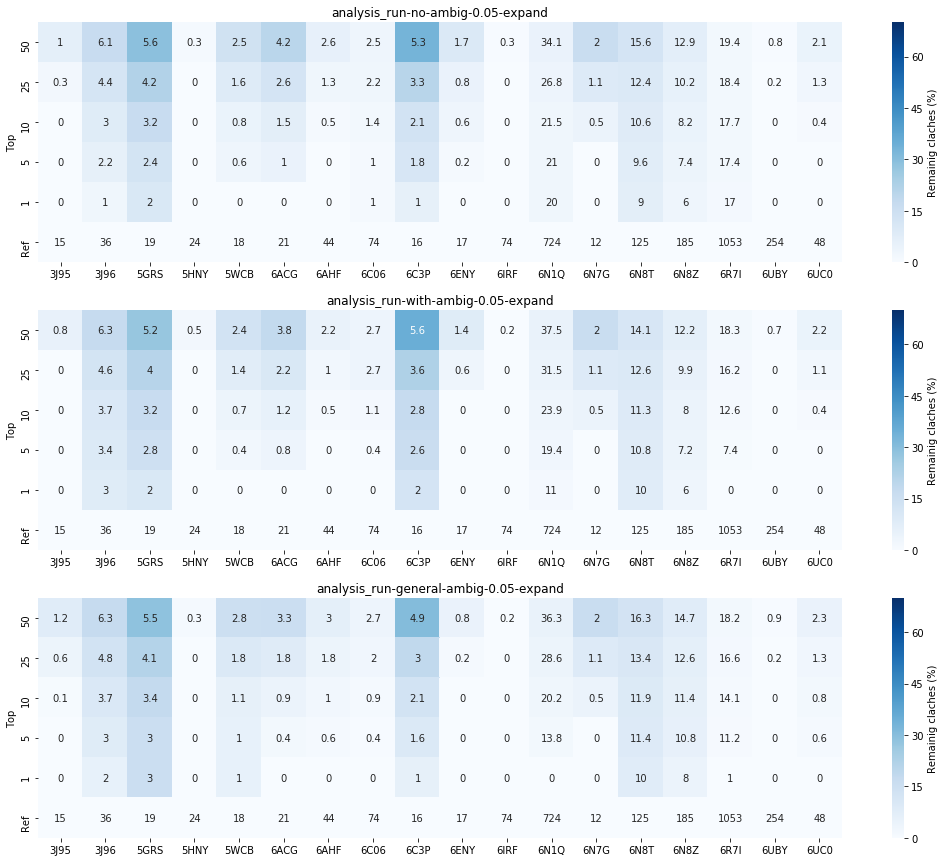

In [6]:

make_heatmap(["analysis_run-no-ambig-0.05-expand", "analysis_run-with-ambig-0.05-expand", "analysis_run-general-ambig-0.05-expand"])
#plt.savefig("clashes-to-clashes-expand", dpi = 300)





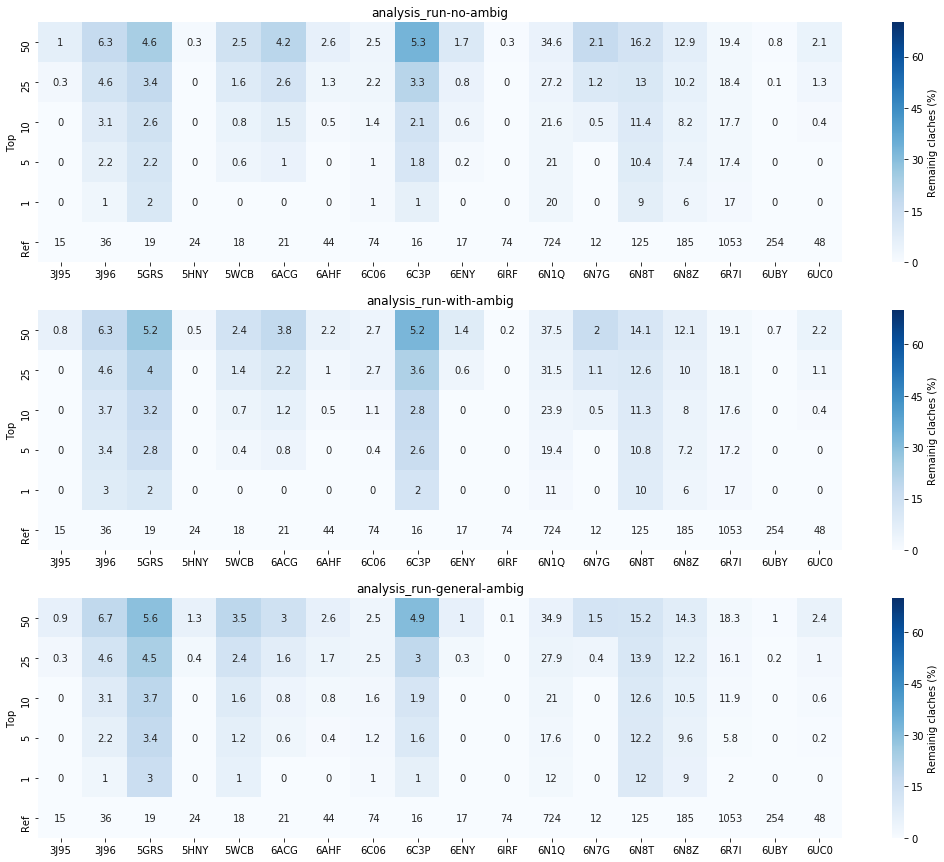

In [7]:
make_heatmap(["analysis_run-no-ambig", "analysis_run-with-ambig", "analysis_run-general-ambig"])
#plt.savefig("clashes-to-clashes", dpi = 300)



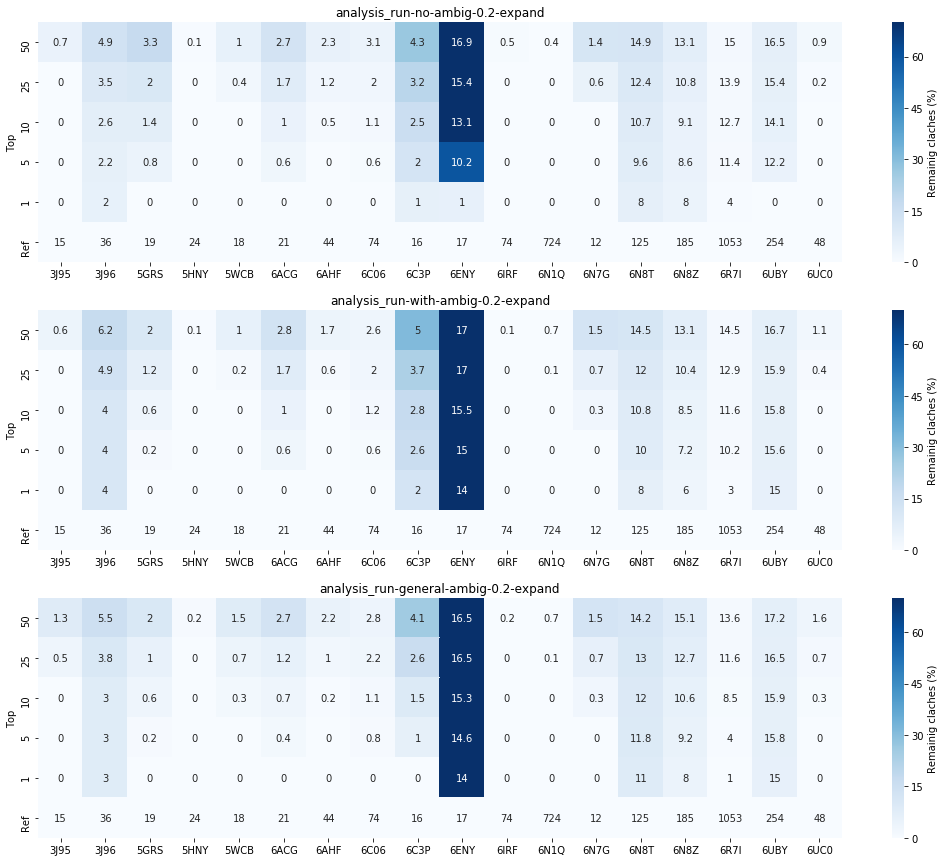

In [8]:
make_heatmap(["analysis_run-no-ambig-0.2-expand", "analysis_run-with-ambig-0.2-expand", "analysis_run-general-ambig-0.2-expand"])